<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Prediction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agritech Pest Prediction and Classification

### Preprocessed Dataset Overview:
- Total Rows: 153
- Total Columns: 15
- Data Types:
  - 3 Object (String) Columns: `Date`, `Time`, `Location`
  - 11 Float Columns: `Number of Insects`, `New Catches`, `Average Temperature`, `Temp_low`, `Temp_high`, `Average Humidity`, `Day Avg_temp`, `Day Min_temp`, `Day Max_temp`, `Day Avg_Humidity`, and `Temp_change`
  - 1 Integer Column: `Event`, Binary indicator (0 or 1), representing an event occurrence.

### Column Breakdown:
1. Date & Time: Represent the timestamp of each record.
2. Number of Insects & New Catches: Key target variables for regression and classification.
3. Event: Binary indicator, possibly for significant occurrences.
4. Location: Specifies data collection sites (Cicalino1, etc.).
5. Temperature & Humidity Variables:
  - Includes averages, daily minimum/maximum, and changes.
6. Temp_change: Measures temperature variation.

### Observations:
- No missing values.
- The dataset is structured with meteorological and pest count variables, ideal for predictive modeling.

### Import required libraries and read the data

In [3]:
# Import required libraries
import os
import pandas as pd
import numpy as np

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read data
Final_Agritech_Pest_DS = pd.read_csv('/content/Final_Merged_Dataset_Cleaned.csv')

# Showing first rows of preprocessed Agritech Pest dataset
print(Final_Agritech_Pest_DS.head())

         Date      Time  Number of Insects  New Catches  Event   Location  \
0  2024-07-06  06:01:00                0.0          0.0      0  Cicalino1   
1  2024-07-07  06:04:00                0.0          0.0      0  Cicalino1   
2  2024-07-08  06:03:00                0.0          0.0      0  Cicalino1   
3  2024-07-09  06:05:00                0.0          0.0      1  Cicalino1   
4  2024-07-10  06:03:00                0.0          0.0      0  Cicalino1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  Day Avg_temp  \
0                13.91      13.6       14.4             97.65         22.34   
1                20.78      20.1       21.2             83.49         23.52   
2                19.03      18.7       19.5             96.87         25.67   
3                15.33      15.0       15.7             82.29         25.87   
4                15.48      15.0       16.0             87.12         26.41   

   Day Min_temp  Day Max_temp  Day Avg_Humidity  Temp_change  

In [6]:
# Summary of dataset
Final_Agritech_Pest_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 153 non-null    object 
 1   Time                 153 non-null    object 
 2   Number of Insects    153 non-null    float64
 3   New Catches          153 non-null    float64
 4   Event                153 non-null    int64  
 5   Location             153 non-null    object 
 6   Average Temperature  153 non-null    float64
 7   Temp_low             153 non-null    float64
 8   Temp_high            153 non-null    float64
 9   Average Humidity     153 non-null    float64
 10  Day Avg_temp         153 non-null    float64
 11  Day Min_temp         153 non-null    float64
 12  Day Max_temp         153 non-null    float64
 13  Day Avg_Humidity     153 non-null    float64
 14  Temp_change          153 non-null    float64
dtypes: float64(11), int64(1), object(3)
memo

In [8]:
# Summary of dataset
print(Final_Agritech_Pest_DS.describe())

       Number of Insects  New Catches       Event  Average Temperature  \
count         153.000000   153.000000  153.000000           153.000000   
mean            0.392157     0.169935    0.163399            20.569641   
std             0.844762     0.497240    0.370943             2.855747   
min             0.000000     0.000000    0.000000            13.910000   
25%             0.000000     0.000000    0.000000            18.490000   
50%             0.000000     0.000000    0.000000            20.280000   
75%             0.000000     0.000000    0.000000            22.450000   
max             5.000000     4.000000    1.000000            27.000000   

         Temp_low   Temp_high  Average Humidity  Day Avg_temp  Day Min_temp  \
count  153.000000  153.000000        153.000000    153.000000    153.000000   
mean    20.224183   20.977451         82.332582     27.029020     18.768301   
std      2.787006    2.934341         10.905657      2.160891      1.998641   
min     13.600000

In [9]:
# Check for missing values
print(Final_Agritech_Pest_DS.isnull().sum())

Date                   0
Time                   0
Number of Insects      0
New Catches            0
Event                  0
Location               0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Day Avg_temp           0
Day Min_temp           0
Day Max_temp           0
Day Avg_Humidity       0
Temp_change            0
dtype: int64


## Feature Extracting

In [16]:
# Copy dataset in a dataframe
df = Final_Agritech_Pest_DS.copy()

# Convert "Date" to datetime format and extract useful time-based features
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday  # Monday=0, Sunday=6

# Convert "Time" to datetime format and extract hour and minute
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

# Create lag features (previous days' insect counts)
df = df.sort_values(by=["Location", "Date"])  # Ensure sorting for lag features
df["Lag_1"] = df.groupby("Location")["Number of Insects"].shift(1)
df["Lag_2"] = df.groupby("Location")["Number of Insects"].shift(2)
df["Lag_3"] = df.groupby("Location")["Number of Insects"].shift(3)

# Fill missing values in lag features with 0 (assuming no prior data)
df[["Lag_1", "Lag_2", "Lag_3"]] = df[["Lag_1", "Lag_2", "Lag_3"]].fillna(0)

# Display the updated dataset with new features
print(df)

          Date      Time  Number of Insects  New Catches  Event   Location  \
0   2024-07-06  06:01:00                0.0          0.0      0  Cicalino1   
1   2024-07-07  06:04:00                0.0          0.0      0  Cicalino1   
2   2024-07-08  06:03:00                0.0          0.0      0  Cicalino1   
3   2024-07-09  06:05:00                0.0          0.0      1  Cicalino1   
4   2024-07-10  06:03:00                0.0          0.0      0  Cicalino1   
..         ...       ...                ...          ...    ...        ...   
148 2024-08-19  00:00:00                0.0          0.0      0     Imola3   
149 2024-08-20  00:02:00                1.0          1.0      0     Imola3   
150 2024-08-21  00:04:00                1.0          0.0      0     Imola3   
151 2024-08-22  00:00:00                2.0          1.0      0     Imola3   
152 2024-08-23  00:02:00                3.0          1.0      0     Imola3   

     Average Temperature  Temp_low  Temp_high  Average Humidity

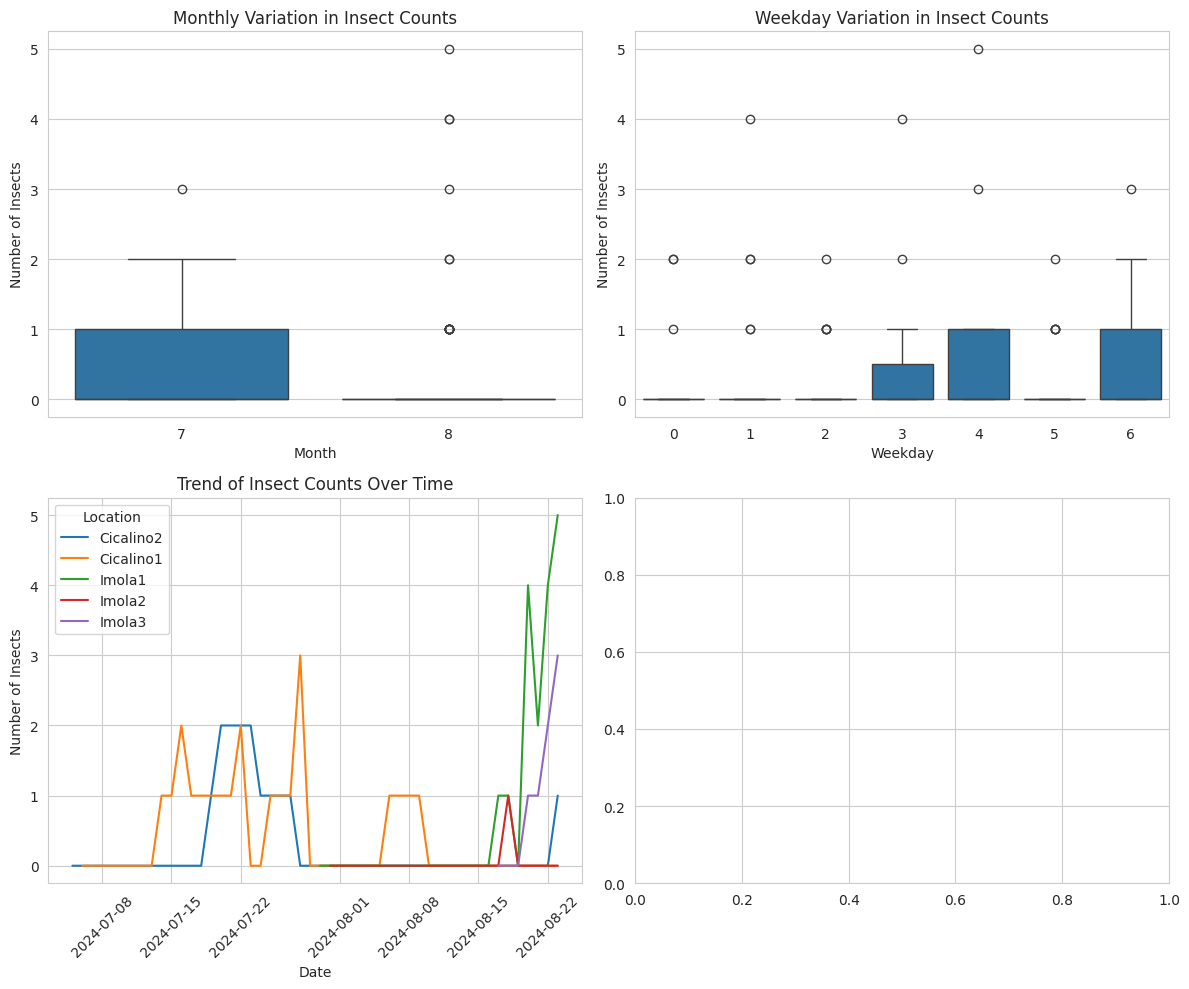

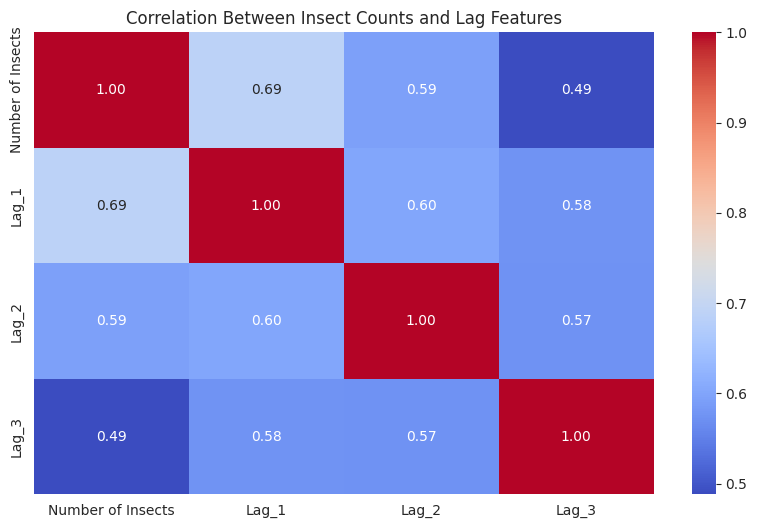

In [19]:
# Set plot style
sns.set_style("whitegrid")

# --- Time-Based Features Visualization ---

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Insect counts by month
sns.boxplot(x="Month", y="Number of Insects", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Monthly Variation in Insect Counts")

# Insect counts by weekday
sns.boxplot(x="Weekday", y="Number of Insects", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Weekday Variation in Insect Counts")

# Insect counts over time
df_sorted = df.sort_values(by=["Date"])
sns.lineplot(x="Date", y="Number of Insects", hue="Location", data=df_sorted, ax=axes[1, 0])
axes[1, 0].set_title("Trend of Insect Counts Over Time")
axes[1, 0].tick_params(axis='x', rotation=45)

# Insect counts by year (if applicable)
if df["Year"].nunique() > 1:
    sns.boxplot(x="Year", y="Number of Insects", data=df, ax=axes[1, 1])
    axes[1, 1].set_title("Yearly Variation in Insect Counts")

plt.tight_layout()
plt.show()

print("\n")
# --- Lag Features Visualization ---

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[["Number of Insects", "Lag_1", "Lag_2", "Lag_3"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Between Insect Counts and Lag Features")

plt.show()

## Model Implementation